In [72]:
import numpy as np
import matplotlib.pyplot as plt

import adaptivealgo.cli.policy_iter as pi
from adaptivealgo.lib.simulator import Simulator
import adaptivealgo.cli.simulate_policy as sim

In [73]:
n_links = 2
f_thresh = 0.5
actions = [0.1, 0.2, 0.3]
alpha = 1.0
gamma = 0.1
tol = 1e-6

n_episodes = 1000

In [74]:
policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
print(policy)
print(f"Policy iteration took {i} iterations")

simulator = Simulator(policy["policy"], n_links, f_thresh, actions, alpha, gamma)
opt_samples = sim.gen_policy_samples(simulator, n_episodes)
print(f"Mean runtime: {np.mean(opt_samples)} steps")

{'n_links': 2, 'f_thresh': 0.5, 'actions': [0.1, 0.2, 0.3], 'alpha': 1.0, 'gamma': 0.1, 'policy': {'[]': 2, '[1]': 2, '[2]': 2, '[3]': 2, '[4]': 2, '[5]': 2, '[6]': 2, '[7]': 2, '[8]': 2, '[9]': 2}}
Policy iteration took 2 iterations
Mean runtime: 7.739 steps


In [75]:
sp_samples = {}

for action_idx, action in enumerate(actions):
    subopt_policy = {s: 0 for s in policy["policy"].keys()}

    try:
        simulator = Simulator(subopt_policy, n_links, f_thresh, [action], alpha, gamma)
    except AssertionError:
        sp_samples[action_idx] = []
        print(f"Mean runtime for action {action}: +inf steps")
        continue

    sp_samples[action_idx] = sim.gen_policy_samples(simulator, n_episodes)
    print(f"Mean runtime for action {action}: {np.mean(sp_samples[action_idx])} steps")

Mean runtime for action 0.1: 28.442 steps
Mean runtime for action 0.2: 11.946 steps
Mean runtime for action 0.3: 7.637 steps


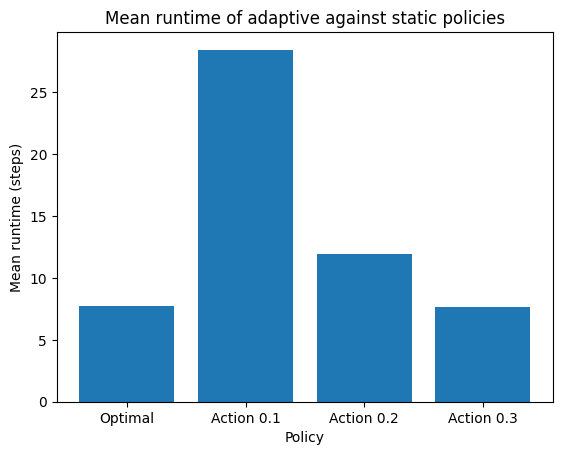

In [76]:
mean_runtimes = [np.mean(opt_samples)] + [np.mean(sp_samples[i]) for i in range(len(actions)) if sp_samples[i]]
policy_idxs = range(len(actions) + 1)

fig, ax = plt.subplots()
ax.bar(policy_idxs, mean_runtimes)
ax.set_xticks(policy_idxs)
ax.set_xticklabels(["Optimal"] + [f"Action {a}" for a in actions])
ax.set_ylabel("Mean runtime (steps)")
ax.set_xlabel("Policy")
ax.set_title("Mean runtime of adaptive against static policies")
plt.show()

In [77]:
means_opt = []
means_sp = []

for n_links in range(2, 6):

    policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
    print(f"Policy iteration for {n_links} links took {i} iterations")

    simulator = Simulator(policy["policy"], n_links, f_thresh, actions, alpha, gamma)
    opt_samples = sim.gen_policy_samples(simulator, n_episodes)
    means_opt.append(np.mean(opt_samples))

    sp_samples = {}

    for action_idx, action in enumerate(actions):
        subopt_policy = {s: 0 for s in policy["policy"].keys()}

        try:
            simulator = Simulator(subopt_policy, n_links, f_thresh, [action], alpha, gamma)
        except AssertionError:
            sp_samples[action_idx] = []
            continue

        sp_samples[action_idx] = sim.gen_policy_samples(simulator, n_episodes)

    print([np.mean(sp_samples[i]) for i in range(len(actions)) if sp_samples[i]])
    means_sp.append([np.mean(sp_samples[i]) for i in range(len(actions)) if sp_samples[i]])

Policy iteration for 2 links took 2 iterations
[28.205, 11.817, 7.691]
Policy iteration for 3 links took 2 iterations
[85.689, 26.897, 18.235]
Policy iteration for 4 links took 2 iterations
[403.306, 93.755, 65.169]
Policy iteration for 5 links took 3 iterations
[2739.006, 443.654, 595.727]


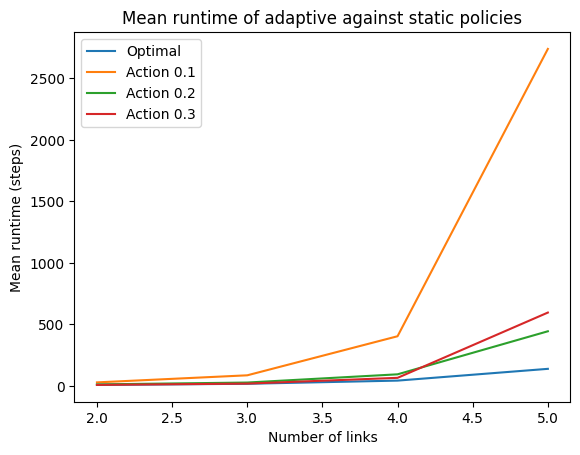

In [79]:
fig, ax = plt.subplots()
ax.plot(range(2, 6), means_opt, label="Optimal")
for action_idx, action in enumerate(actions):
    ax.plot(range(2, 6), [means_sp[i][action_idx] for i in range(4)], label=f"Action {action}")
ax.set_xlabel("Number of links")
ax.set_ylabel("Mean runtime (steps)")
ax.set_title("Mean runtime of adaptive against static policies")
ax.legend()
plt.show()